In [ ]:
"""


"""

In [ ]:
# import relevant libraries
import pandas as pd
import onc
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# access my private API token and connect
load_dotenv()
token = os.getenv("ONC_TOKEN")
my_onc = onc.ONC(token)

In [ ]:

def get_device_properties(start: str, end: str, deviceCode: str, sensorCategoryCodes: str):

    params = {
        "deviceCode": deviceCode,
        "sensorCategoryCodes": sensorCategoryCodes,
        "sensorCategoryCodes": "depth",
        "dateFrom": start,
        "dateTo" : end
    }

    # JSON response from ONC
    result = my_onc.getScalardata(params)

    # error handle if there is no data returned
    if not result or "sensorData" not in result or result["sensorData"] is None or len(result["sensorData"]) == 0:
        print(f"No data returned for device {deviceCode} between {start} and {end}.")
        return
        
    else:
        # extract the relevant sensors

        temp_sensor = result["sensorData"][0]

        # extract each sensors data fields
        times = temp_sensor["data"]["sampleTimes"]
        temp_values = temp_sensor["data"]["values"]
        flags = temp_sensor["data"]["qaqcFlags"] # flags for quality assurance

        # populate dataframe (Pandas)
        df = pd.DataFrame({
            # syntax: "label": variable
            "timestamp": pd.to_datetime(times), # convert strings to datetime objects
            "values": temp_values,
            "qaqcFlags": flags
        })

def plot_temp_by_device_id(start: str, end: str, locationCode: str, deviceCode: str) -> None:

        # reformat dates
        start_dt = pd.to_datetime(start).strftime("%b %d, %Y %H:%M")
        end_dt = pd.to_datetime(end).strftime("%b %d, %Y %H:%M")

        
        # plot the dataframe using matplotlib
        plt.figure(figsize=(12, 6))

        plt.plot(df["timestamp"], df["values"], linewidth=1, label="Temperature (°C)")

        plt.xlabel("Time")
        plt.ylabel("Temperature (°C)")
        plt.title(f"{deviceCode} at {locationCode}\n{start_dt} to {end_dt}")
        plt.grid(True)
        plt.legend()

        # Format x-axis timestamps
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M'))
        plt.gcf().autofmt_xdate()

        plt.tight_layout()
        plt.show()
    


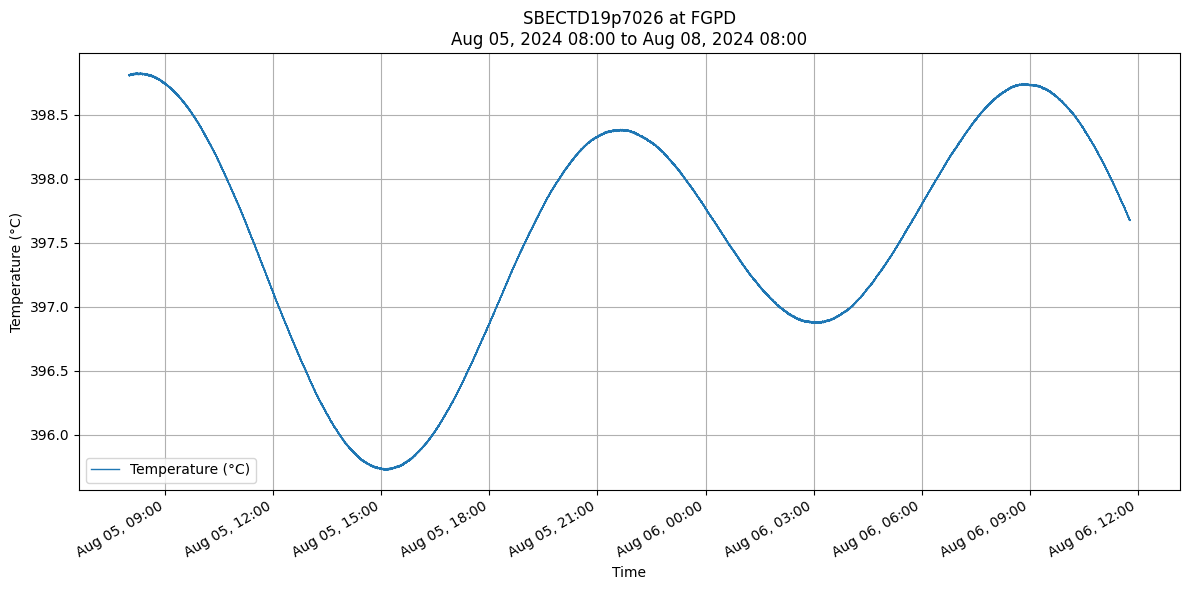

In [4]:
dateFrom = "2024-08-05T08:00:00.000Z"
dateTo = "2024-08-08T08:00:00.000Z"
plot_temp_by_device_id(dateFrom, dateTo, "FGPD", "SBECTD19p7026") # Sea-Bird SeaCAT SBE19plus V2 7026 @ deep